In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import danish
import numpy as np
import matplotlib.pyplot as plt
import galsim

In [3]:
factory = danish.DonutFactory()  # Default is Rubin

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
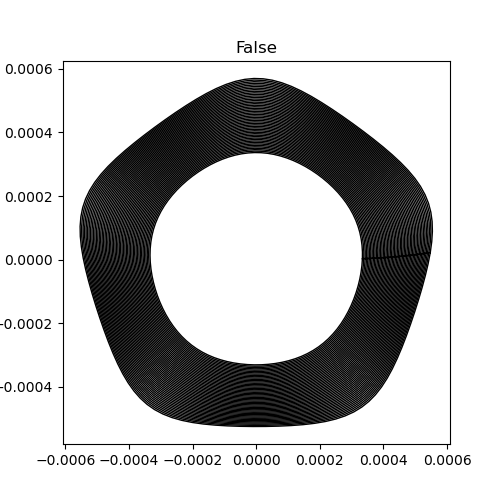

In [4]:
aberrations = np.zeros(67)
aberrations[4] = 30
aberrations[21] = 1
aberrations *= 670e-9

Z = galsim.zernike.Zernike(
    aberrations, R_outer=factory.R_outer, R_inner=factory.R_inner
)
Z1 = Z*factory.focal_length
nrad = 50
naz = 100
radii = np.linspace(factory.R_outer, factory.R_inner, nrad)
th = np.linspace(0, 2*np.pi, naz)
uu, vv = np.cos(th), np.sin(th)

u0 = uu * radii[0]
v0 = vv * radii[0]
x0, y0 = danish.factory._pupil_to_focal(u0, v0, Z1)

%matplotlib widget
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot()
ax.plot(x0, y0, c='k', lw=1)

for radius in radii[1:]:
    u1 = uu * radius
    v1 = vv * radius
    x1, y1 = danish.factory._pupil_to_focal(u1, v1, Z1)
    ax.plot(x1, y1, c='k', lw=1)

ax.set_aspect('equal')
ax.set_title(factory.is_caustic(aberrations=aberrations))
plt.show()